In [1]:
import pandas as pd

In [2]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

Отображение графика

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

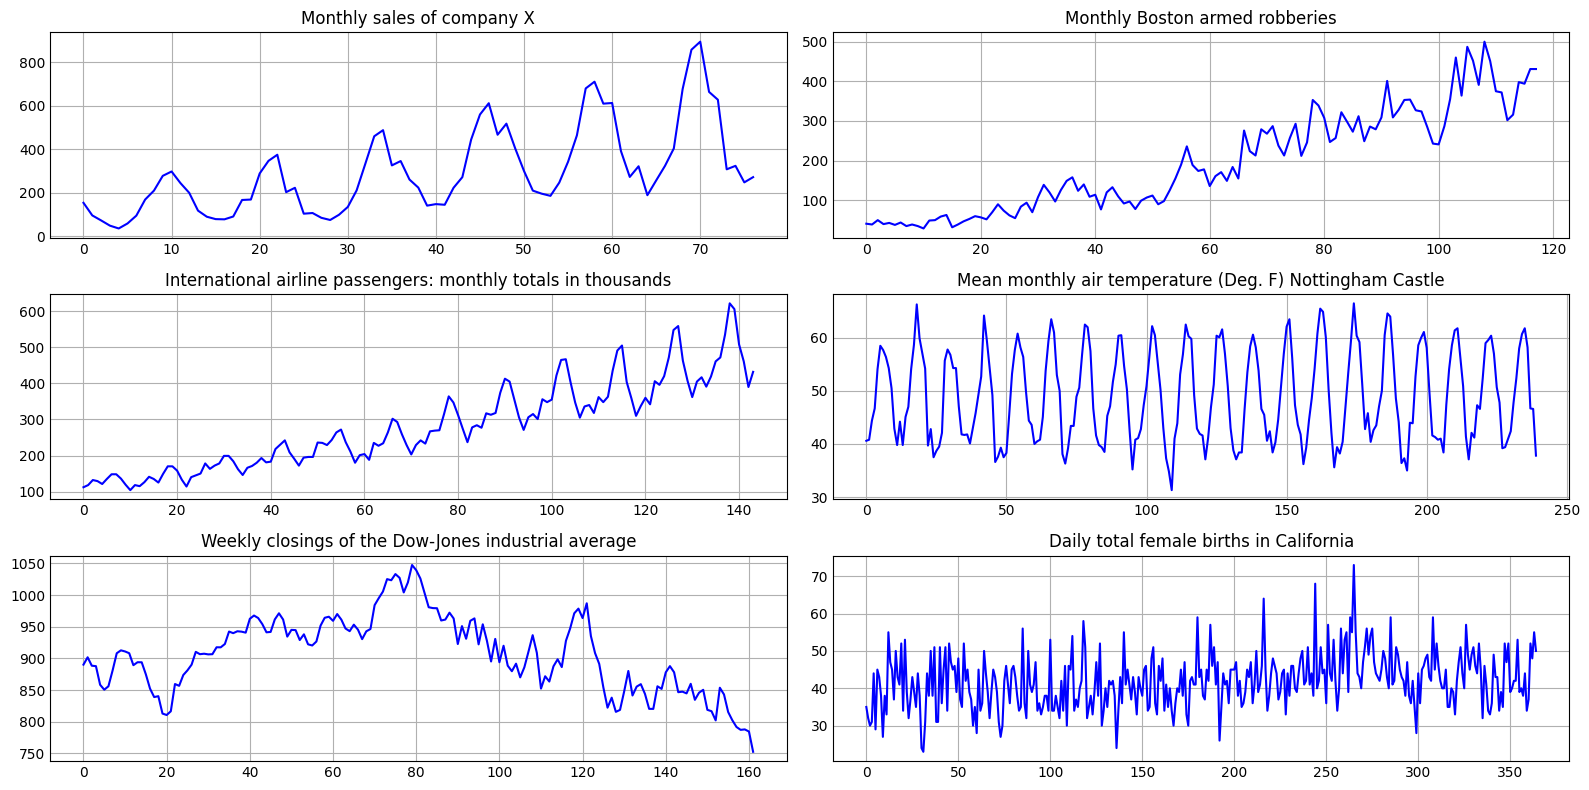

In [5]:
with plt.style.context('_mpl-gallery'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

**"Monthly sales of company X": sales_of_company_x["Count"]**

In [6]:
M_s_o_c_X = sales_of_company_x["Count"]

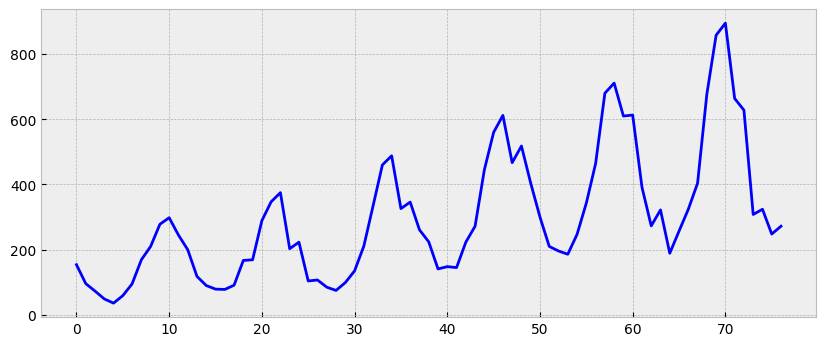

In [7]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(M_s_o_c_X, color='blue')

In [ ]:
#нормализую дисперсию

In [8]:
from scipy.stats import boxcox

In [9]:
M_s_o_c_X_bc = boxcox(M_s_o_c_X, 0) #убрала дисперсию, разброс

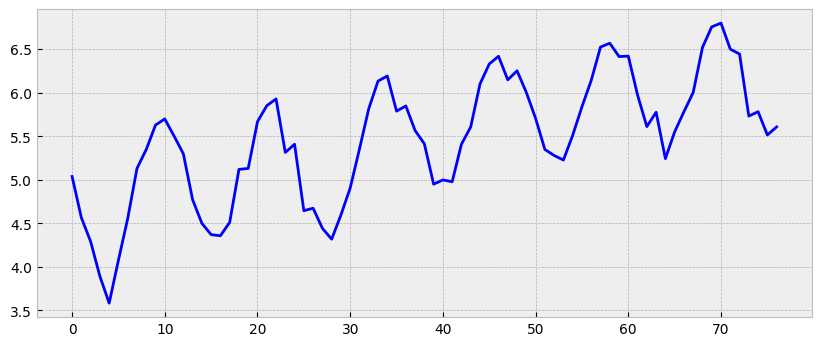

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(M_s_o_c_X_bc, color='blue')

In [ ]:
#дифференцирую

In [10]:
import numpy as np

In [11]:
M_s_o_c_X_bc_diff = np.diff(M_s_o_c_X_bc, 1) #убрала тренд

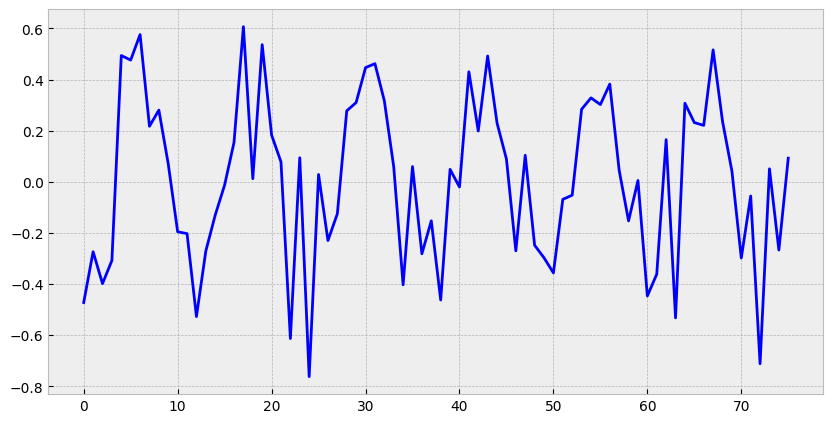

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 5))
        plt.plot(M_s_o_c_X_bc_diff, color='blue')

In [ ]:
#с помощью коррелограммы ищу шаг сезонности

In [12]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [13]:
def tsplot(y, lags=None, figsize=(10, 5), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

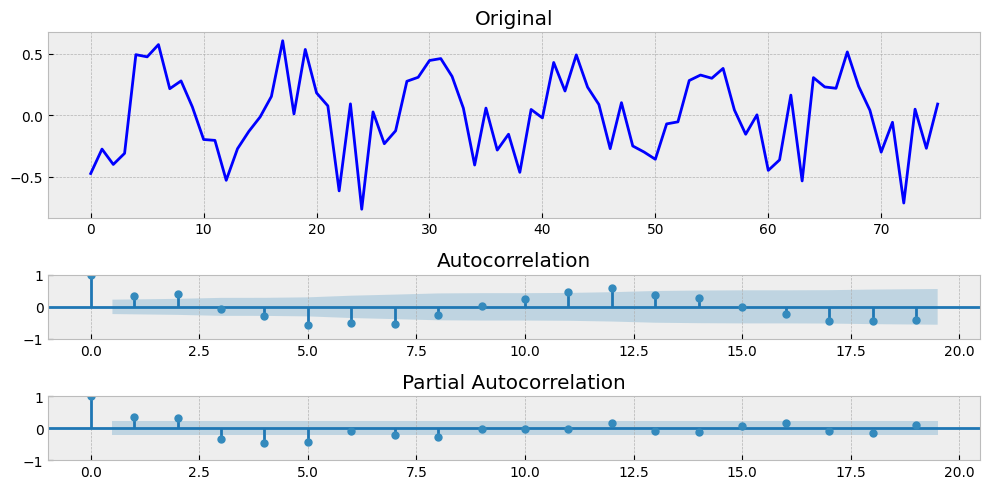

In [14]:
tsplot(M_s_o_c_X_bc_diff)

In [ ]:
#судя по графику автокорреляции, шаг сезонности равен 12

In [ ]:
#дифференцирую второй раз

In [15]:
M_s_o_c_X_bc_diff2 = np.diff(M_s_o_c_X_bc_diff, 12) #убрала сезонность

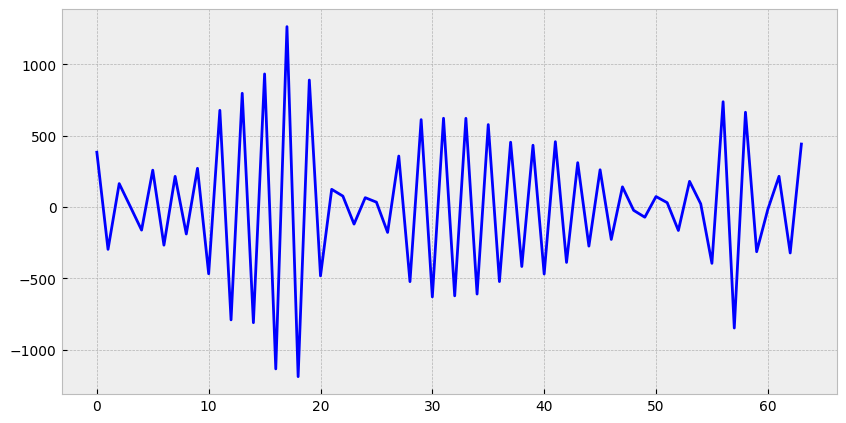

In [16]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 5))
        plt.plot(M_s_o_c_X_bc_diff2, color='blue')

In [ ]:
#тест Дики-Фуллера

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
test_stationarity(M_s_o_c_X)

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [ ]:
test_stationarity(M_s_o_c_X_bc_diff2)

Results of Dickey-Fuller Test:
Test Statistic                -6.850387e+00
p-value                        1.700212e-09
#Lags Used                     1.100000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


Проверяю гипотезу не стационарности против стационарности

Изначальный показатель p-value был почти 1, что говорит о том, что гипотезу о стационарности можно опровергнуть, график не стационарен.

После преобразований p-value упал до 0.000000001700212, значит гипотезу о стационарности не опровергаю, график скорее стационарный.

**"Monthly Boston armed robberies": robberies_in_boston["Count"]**

In [19]:
M_B_a_r = robberies_in_boston["Count"]

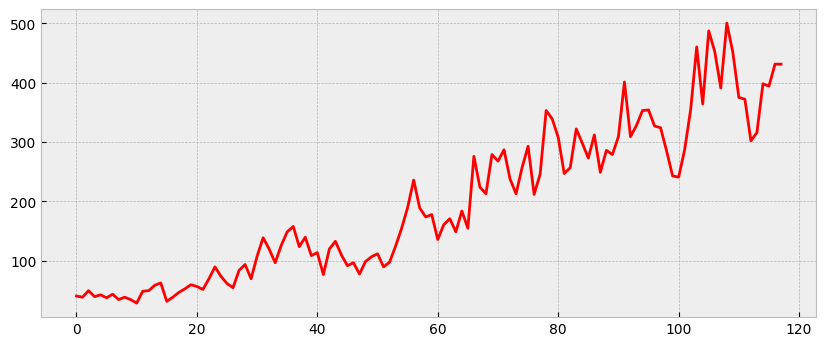

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(M_B_a_r, color='red')

In [20]:
#нормализую дисперсию
M_B_a_r_bc = boxcox(M_B_a_r, 0) #убрала дисперсию, разброс

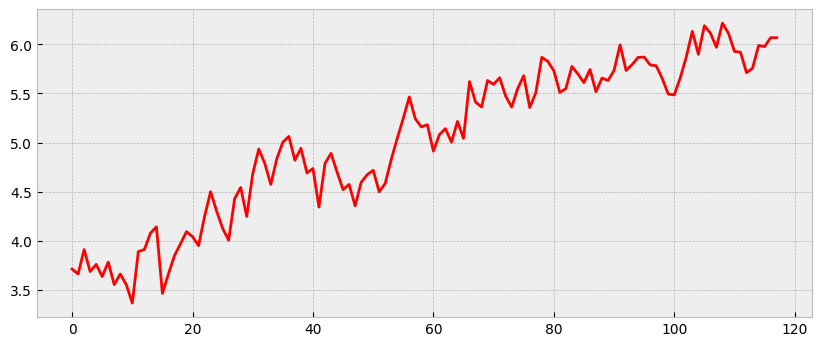

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(M_B_a_r_bc, color='red')

In [21]:
#дифференцирую
M_B_a_r_bc_diff = np.diff(M_B_a_r_bc, 1) #убрала тренд

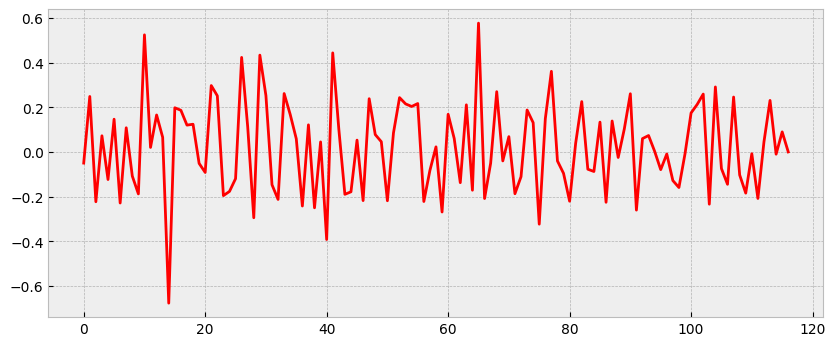

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(M_B_a_r_bc_diff, color='red')

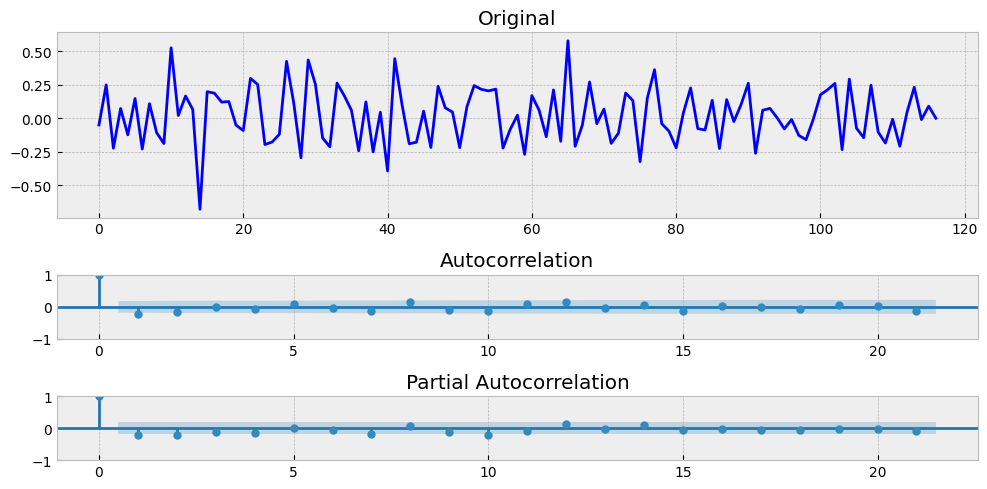

In [ ]:
tsplot(M_B_a_r_bc_diff)

In [ ]:
#на кореллограмме видно, что у графика плохо выраженна сезонность. Autocorrelation даже больше характерна стационарному
#графику (первое значение высокое, а потом резко падает). На графике original я заметила некие схожие пики с шагом 25

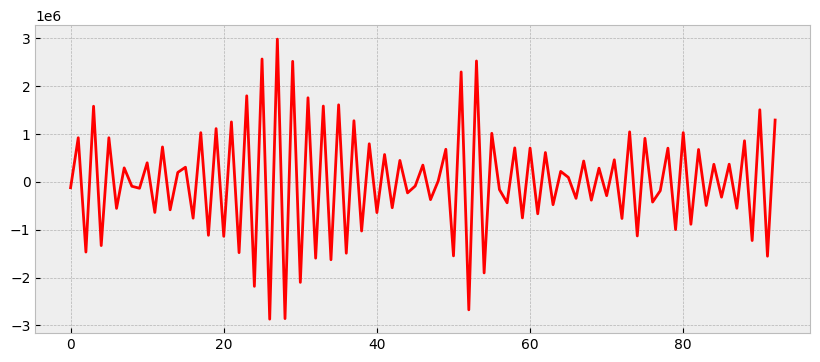

In [22]:
M_B_a_r_bc_diff2 = np.diff(M_B_a_r_bc, 25) #убрала сезонность
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(M_B_a_r_bc_diff2, color='red')

In [ ]:
#тест Дики-Фуллера
test_stationarity(M_B_a_r)
test_stationarity(M_B_a_r_bc_diff2)

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.701442e+01
p-value                        8.545246e-30
#Lags Used                     1.200000e+01
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64


Проверяю гипотезу не стационарности против стационарности

Изначальный показатель p-value был почти 1, что говорит о том, что гипотезу о стационарности можно опровергнуть, график не стационарен.

После преобразований p-value упал до 0.00000000, значит гипотезу о стационарности не опровергаю, график скорее стационарный.

**"International airline passengers: monthly totals in thousands": airlines_passengers["Count"]**

In [32]:
I_a_p = airlines_passengers["Count"]

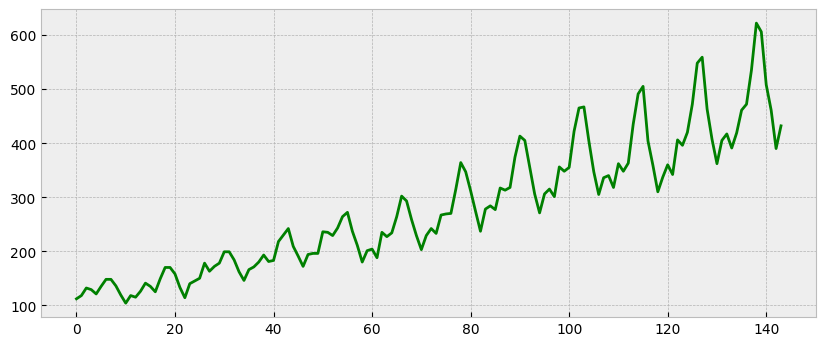

In [24]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(I_a_p, color='green')

In [33]:
#нормализую дисперсию
I_a_p_bc = boxcox(I_a_p, 0) #убрала дисперсию, разброс

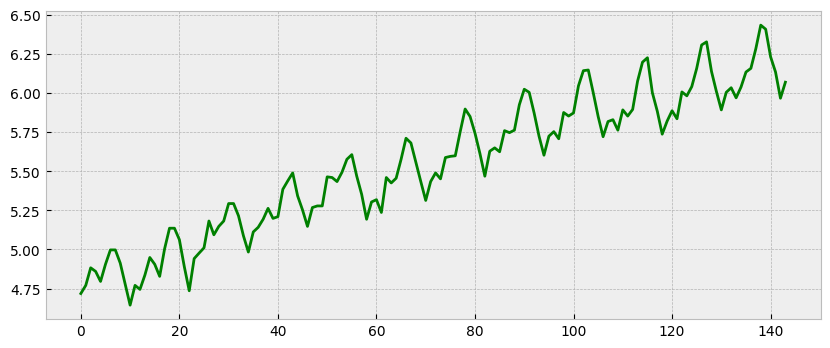

In [34]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(I_a_p_bc, color='green')

In [35]:
#дифференцирую
I_a_p_bc_diff = np.diff(I_a_p_bc, 1) #убрала тренд

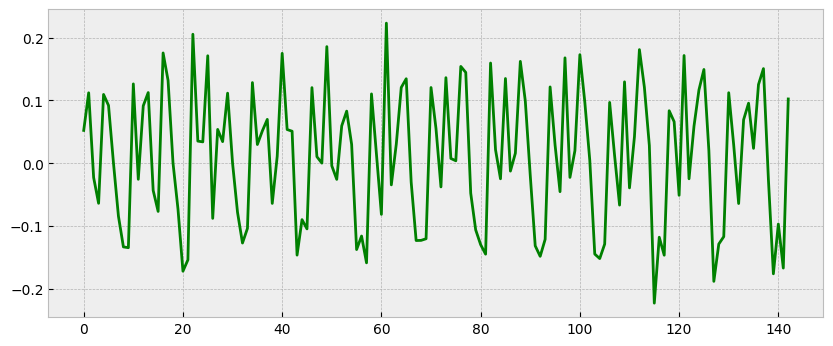

In [36]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(I_a_p_bc_diff, color='green')

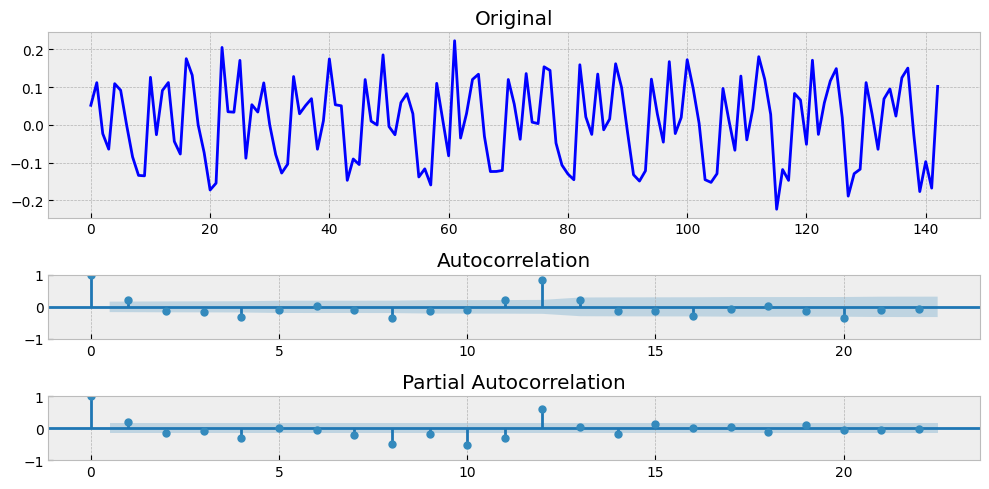

In [29]:
tsplot(I_a_p_bc_diff)

In [ ]:
#судя по графику автокорреляции, шаг сезонности равен 12

In [37]:
I_a_p_bc_diff2 = np.diff(I_a_p_bc_diff, 12) #убрала сезонность

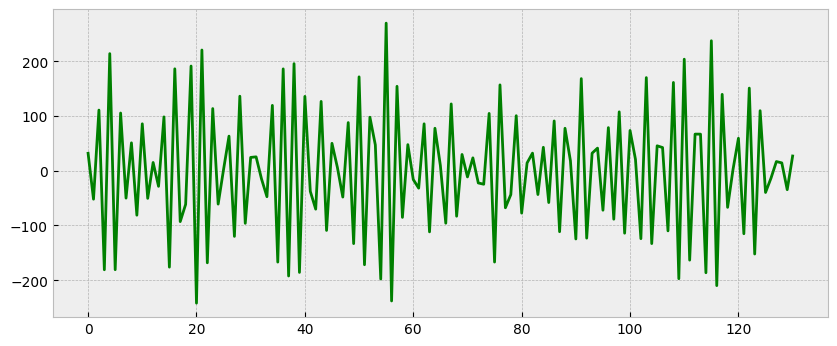

In [39]:
with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        plt.plot(I_a_p_bc_diff2, color='green')

In [41]:
#тест Дики-Фуллера
test_stationarity(I_a_p)
test_stationarity(I_a_p_bc_diff2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.609085e+01
p-value                        5.255378e-29
#Lags Used                     1.300000e+01
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64


Проверяю гипотезу не стационарности против стационарности

Изначальный показатель p-value был почти 1, что говорит о том, что гипотезу о стационарности можно опровергнуть, график не стационарен.

После преобразований p-value упал до 0.00000000, значит гипотезу о стационарности не опровергаю, график скорее стационарный.

**"Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"]**

In [42]:
M_m_a_t_N_c = mean_monthly_temp["Deg"]

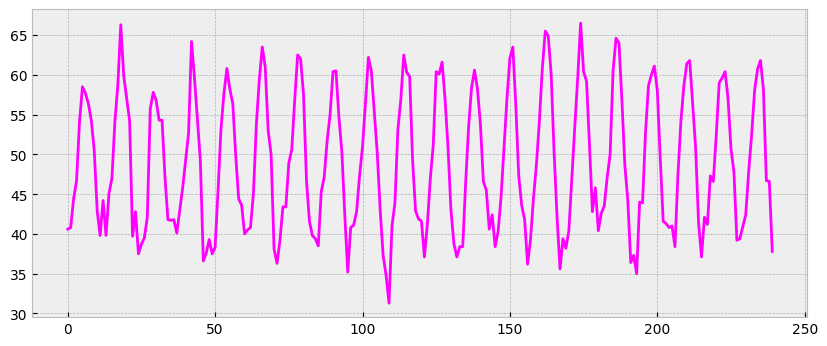

In [44]:
with plt.style.context ('bmh'):
  plt.figure(figsize=(10,4))
  plt.plot(M_m_a_t_N_c, color = 'magenta')

In [45]:
#в данном графике отсутствует разброс дисперсии, boxcox применять не надо, так же отсутствует тренд

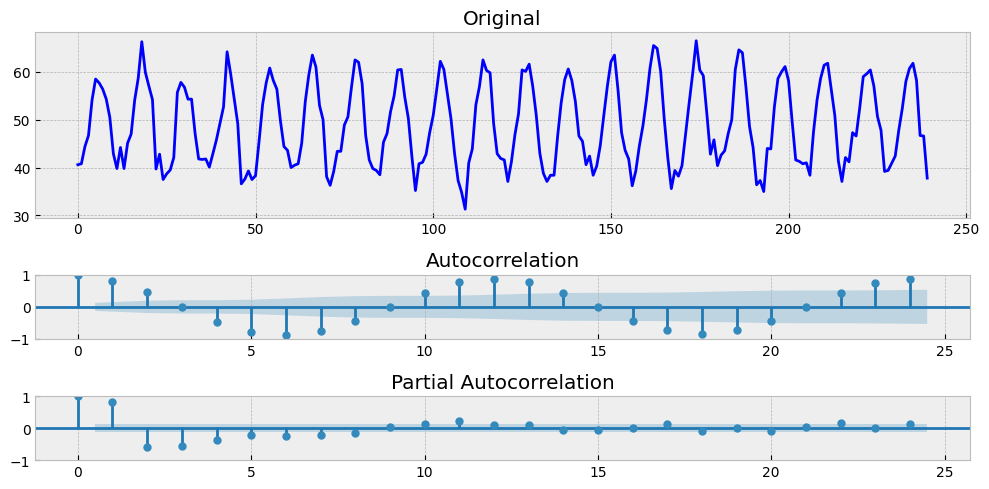

In [47]:
tsplot(M_m_a_t_N_c)

In [ ]:
#судя по графику автокорреляции, шаг сезонности равен 12

In [48]:
M_m_a_t_N_c_diff = np.diff(M_m_a_t_N_c, 12) #убрала сезонность

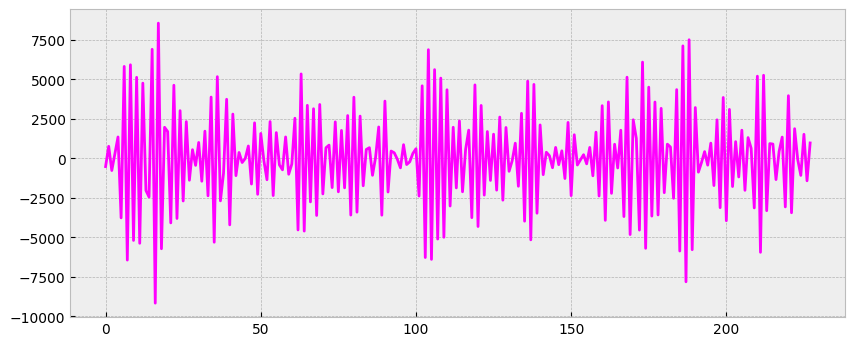

In [49]:
with plt.style.context ('bmh'):
  plt.figure(figsize=(10,4))
  plt.plot(M_m_a_t_N_c_diff, color = 'magenta')

In [51]:
#тест Дики-Фуллера
test_stationarity(M_m_a_t_N_c)
test_stationarity(M_m_a_t_N_c_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.672894e+01
p-value                        1.388342e-29
#Lags Used                     1.500000e+01
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


Проверяю гипотезу не стационарности против стационарности

Изначальный показатель p-value был 0.01, что говорит о том, что гипотезу о стационарности не опровергаю, график стационарен. Но визуально в нем видна сезонность и он не похож на шум.

После удаления сезонности p-value упал до 0.00000000, значит гипотезу о стационарности не опровергаю, график скорее стационарный.

**"Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"]**

In [61]:
W_c_D_J_i_a = dowjones_closing["Close"]

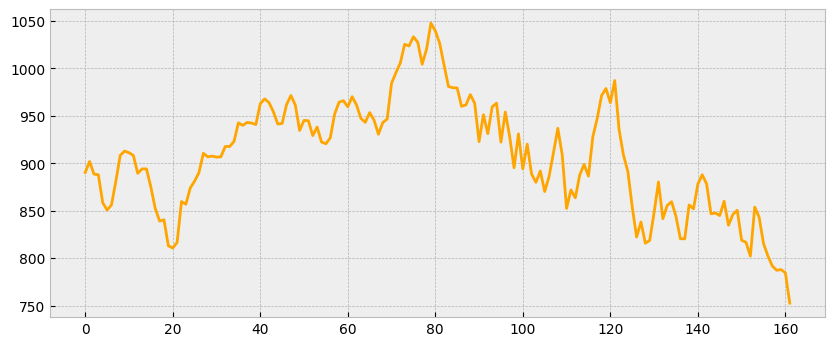

In [54]:
with plt.style.context('bmh'):
  plt.figure(figsize=(10,4))
  plt.plot(W_c_D_J_i_a, color = 'orange')

In [55]:
#разброса дисперсии нет, boxcox применять не надо

In [62]:
W_c_D_J_i_a_diff = np.diff(W_c_D_J_i_a, 1)

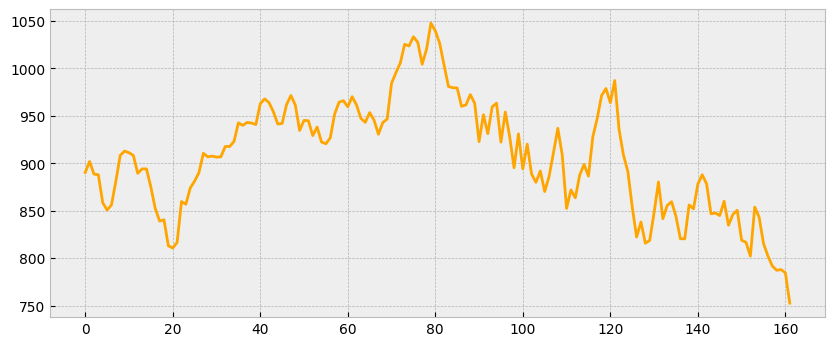

In [58]:
with plt.style.context('bmh'):
  plt.figure(figsize=(10,4))
  plt.plot(W_c_D_J_i_a, color = 'orange')

In [ ]:
#тренда на этом графике нет, и дифференцирование с шагом 1 не дало никакого эффекта

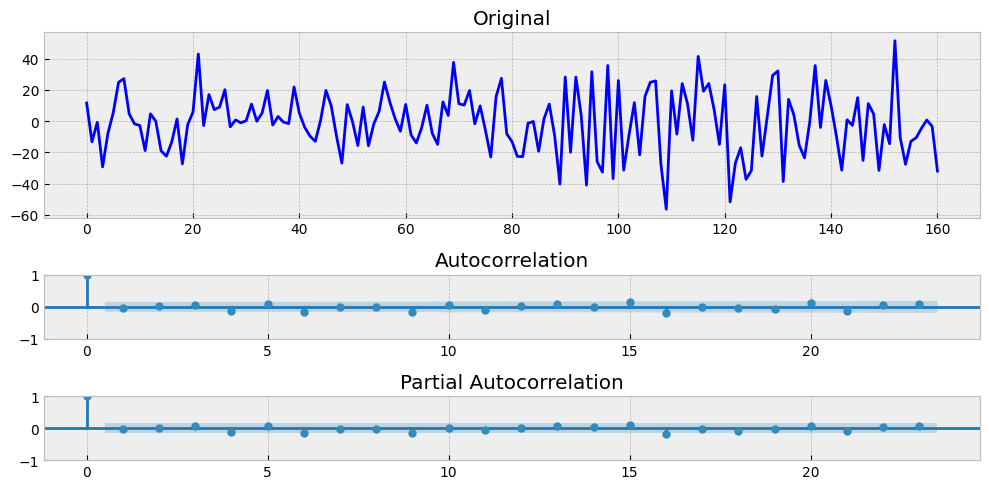

In [59]:
tsplot(W_c_D_J_i_a_diff)

In [63]:
W_c_D_J_i_a_diff2 = np.diff(W_c_D_J_i_a_diff, 5) #убрала сезонность с шагом 5

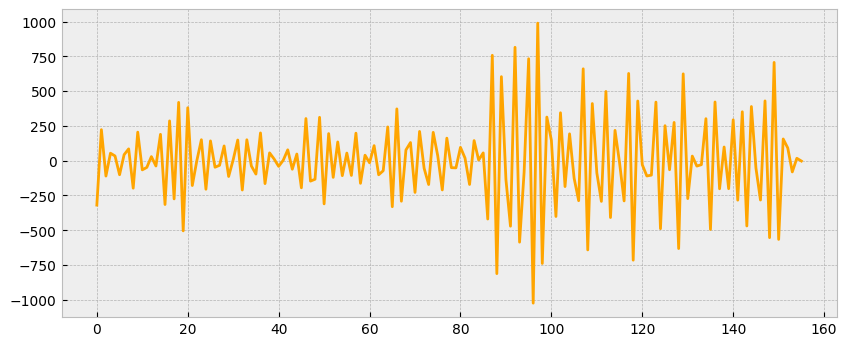

In [64]:
with plt.style.context('bmh'):
  plt.figure(figsize=(10,4))
  plt.plot(W_c_D_J_i_a_diff2, color = 'orange')

In [65]:
#тест Дики-Фуллера
test_stationarity(W_c_D_J_i_a)
test_stationarity(W_c_D_J_i_a_diff2)

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.608881e+00
p-value                        6.557754e-14
#Lags Used                     1.400000e+01
Number of Observations Used    1.410000e+02
Critical Value (1%)           -3.477601e+00
Critical Value (5%)           -2.882266e+00
Critical Value (10%)          -2.577822e+00
dtype: float64


Проверяю гипотезу не стационарности против стационарности

Изначальный показатель p-value был 0.62, что говорит о том, что гипотезу о стационарности можно опровергнуть, график не стационарен.

После преобразований p-value упал до 0.00000000, значит гипотезу о стационарности не опровергаю, график скорее стационарный.

**"Daily total female births in California": female_births["Count"]**

In [66]:
D_t_f_b_C = female_births["Count"]

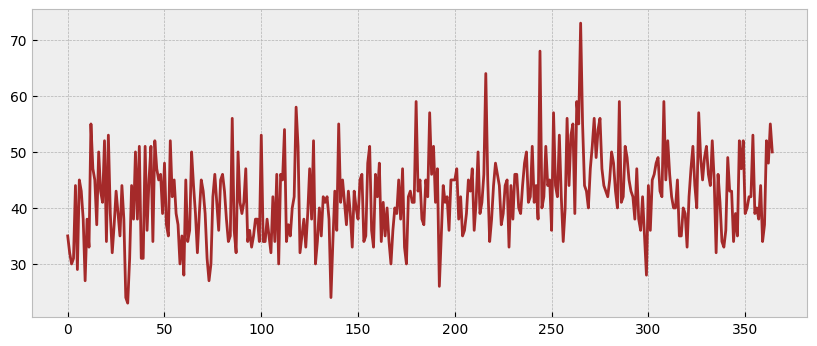

In [69]:
with plt.style.context('bmh'):
  plt.figure(figsize=(10,4))
  plt.plot(D_t_f_b_C, color = 'brown')

In [ ]:
#график изначально похож на стационарный, похож на шум. разброса дисперсии, линии тренда не видно, сезонности и цикличности не видно

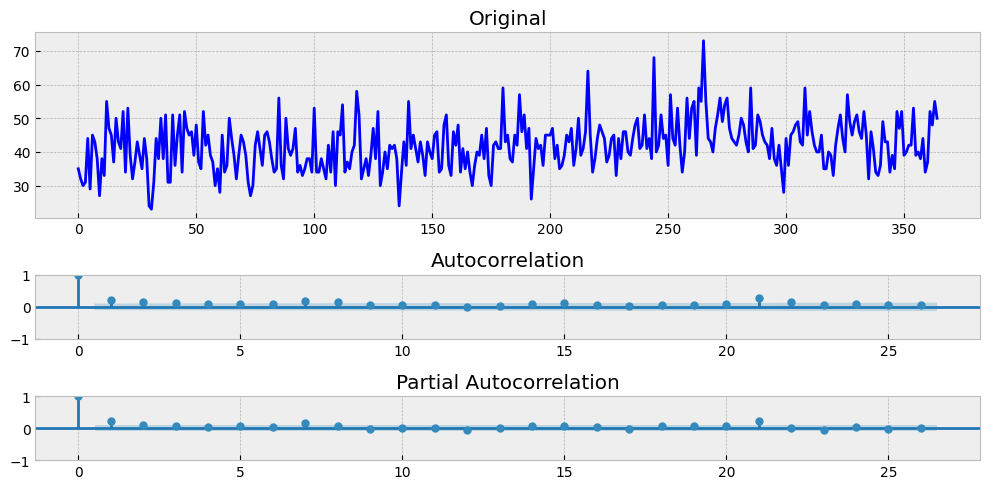

In [70]:
tsplot(D_t_f_b_C)

In [ ]:
#я заметила небольшие пики через 8 и 6 шагов, решила применить дифференцирование с шагом 7

In [73]:
D_t_f_b_C_diff = np.diff(D_t_f_b_C, 7)

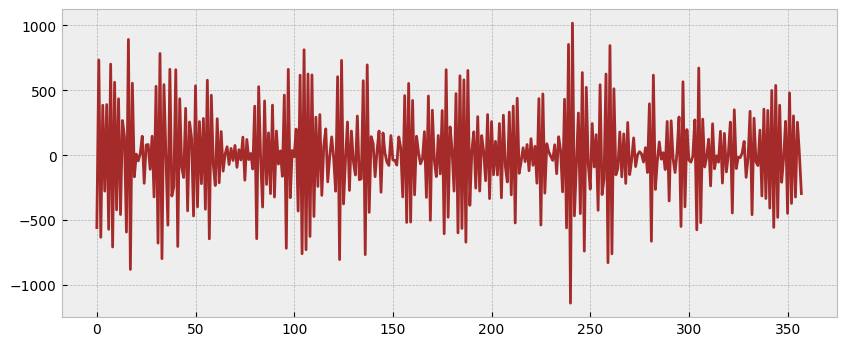

In [74]:
with plt.style.context('bmh'):
  plt.figure(figsize=(10,4))
  plt.plot(D_t_f_b_C_diff, color = 'brown')

In [75]:
#тест Дики-Фуллера
test_stationarity(D_t_f_b_C)
test_stationarity(D_t_f_b_C_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.589510e+01
p-value                        8.453423e-29
#Lags Used                     1.700000e+01
Number of Observations Used    3.400000e+02
Critical Value (1%)           -3.449730e+00
Critical Value (5%)           -2.870079e+00
Critical Value (10%)          -2.571319e+00
dtype: float64


Проверяю гипотезу не стационарности против стационарности

Изначальный показатель p-value был очень низкий 0.000052, что говорит о том, что гипотезу о стационарности не опровергаю, график стационарен. Визуально график сразу был похож на стационарный, похож на шум.

После дифференцирования с шагом 7 p-value упал до 0.00000000, значит гипотезу о стационарности не опровергаю, график скорее стационарный. Визуально график изменился, стал более ровный.